# Task 2: Quantum error correction

In [ ]:
!pip install qiskit
!pip install pylatexenc

In [163]:
%matplotlib inline

import matplotlib
import pylatexenc
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

## The final code

Circuits selection times: 
{0: 180, 2: 164, 1: 156}
Error Gates selection times: [1: I-Gate, 2: X-Gate, 3: Z-Gate]
{1: 180, 3: 164, 2: 156}
500
Average probablility after 500 tries: '00': 0.5122519999999999, '11': 0.511748


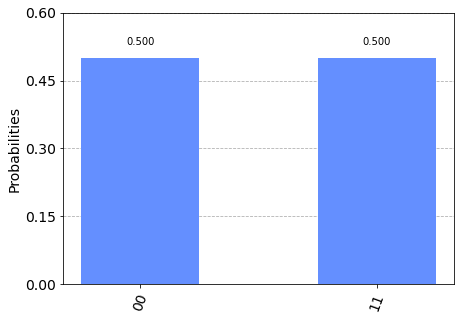

In [190]:
%matplotlib inline

import matplotlib
import pylatexenc
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *
import random

selected_circuit = []
selected_gate = []
results = []

def get_circuit(run_no):

  qr = QuantumRegister(10, 'q')
  cr = ClassicalRegister(2, 'c')

  qc = QuantumCircuit(qr, cr)

  qc.h(qr[0])              # original part from the first circuit q0

  qc.cx(qr[0], qr[4])  # phase inversion correction
  qc.cx(qr[0], qr[7])  # phase inversion correction
  qc.h(qr[0])          # phase inversion correction
  qc.h(qr[4])          # phase inversion correction
  qc.h(qr[7])          # phase inversion correction


  n = 0
  qc.cx(qr[n], qr[n + 2]) # qubit flip correction: second ancillary qubit flipped conditionaly on the value of qubit
  qc.cx(qr[n], qr[n + 3]) # qubit flip correction: third ancillary qubit flipped conditionaly on the value of qubit

  n = 4
  qc.cx(qr[n], qr[n + 1]) # qubit flip correction: first ancillary qubit flipped conditionaly on the value of qubit
  qc.cx(qr[n], qr[n + 2]) # qubit flip correction: second ancillary qubit flipped conditionaly on the value of qubit

  n = 7
  qc.cx(qr[n], qr[n + 1]) # qubit flip correction: first ancillary qubit flipped conditionaly on the value of qubit
  qc.cx(qr[n], qr[n + 2]) # qubit flip correction: second ancillary qubit flipped conditionaly on the value of qubit


  ###############
  
  # Random error creation

  num1 = random.uniform(0.0, 1.0)
  circ = 0
  circ_qubit = 0
  if num1 > 1/3:
    if num1 < 2/3:
      circ = 1
      circ_qubit = 4
    else:
      circ = 2
      circ_qubit = 7
  selected_circuit.append(circ)

  num2 = random.uniform(0.0, 1.0)
  if num1 > 1/3:
    if num1 < 2/3:
      gate = 2
      gate_name = "X"
    else:
      gate = 3
      gate_name = "Z"
  else:
    gate = 1
    gate_name = "I"
  selected_gate.append(gate)

  if gate == 1:
    qc.i(qr[circ_qubit]) # inject gate: I
  elif gate == 2:
    qc.x(qr[circ_qubit]) # inject gate: X
  else:
    qc.z(qr[circ_qubit]) # inject gate: Z


#  print("Run: {}, Selected circuit: {}, Injected error gate: {}".format(run_no, circ, gate_name))

  ###############

  n = 0
  qc.cx(qr[n], qr[n + 2]) # qubit flip correction: second ancillary qubit flipped conditionaly on the value of qubit
  qc.cx(qr[n], qr[n + 3]) # qubit flip correction: third ancillary qubit flipped conditionaly on the value of qubit
  qc.mcx(list(range(n + 2, n + 3 + 1)), n)  # qubit flip correction: toffoli gate

  n = 4
  qc.cx(qr[n], qr[n + 1]) # qubit flip correction: first ancillary qubit flipped conditionaly on the value of qubit
  qc.cx(qr[n], qr[n + 2]) # qubit flip correction: second ancillary qubit flipped conditionaly on the value of qubit
  qc.mcx(list(range(n + 1, n + 2 + 1)), n)  # qubit flip correction: toffoli gate

  n = 7
  qc.cx(qr[n], qr[n + 1]) # qubit flip correction: first ancillary qubit flipped conditionaly on the value of qubit
  qc.cx(qr[n], qr[n + 2]) # qubit flip correction: second ancillary qubit flipped conditionaly on the value of qubit
  qc.mcx(list(range(n + 1, n + 2 + 1)), n)  # qubit flip correction: toffoli gate

  qc.h(qr[0])          # phase inversion correction
  qc.h(qr[4])          # phase inversion correction
  qc.h(qr[7])          # phase inversion correction

  qc.cx(0, 4)      # phase inversion correction
  qc.cx(0, 7)      # phase inversion correction
  qc.mcx([4, 7], 0)  # phase inversion correction: toffoli gate

  qc.cx(0, 1)      # original part from the first circuit (qubit q1)

  qc.measure(range(2), range(2))  # Measure

  return qc

def count_elements(seq) -> dict:
  hist = {}
  for i in seq:
    hist[i] = hist.get(i, 0) + 1
  return hist

backend = Aer.get_backend('qasm_simulator') 

for run_no in range(1, 501):
  circuit = get_circuit(run_no)
  job = execute(circuit, backend, shots=1024) 
  result = job.result() 
  counts = result.get_counts(circuit)
  results.append(counts)


#print(counts)
#plot_histogram(counts)

print("Circuits selection times: ")
print(count_elements(selected_circuit))

print("Error Gates selection times: [1: I-Gate, 2: X-Gate, 3: Z-Gate]")
print(count_elements(selected_gate))


val00 = 0;
val11 = 0;
n = 0
for res in results:
#  print(res)
  val00 = val00 + res['00'];
  val11 = val11 + res['11'];
  n = n + 1

avg_val00 = val00 / n;
avg_val11 = val11 / n;

print(n)

print("Average probablility after {} tries: '00': {}, '11': {}".format(n, avg_val00, avg_val11))
#plot_histogram({'00': avg_val00, '11': avg_val11})




## Description

In the section entitled "The final code" there is a working code for the Task 2.

The code implement's Shor's algorithm.
To validate correctness of the implementation, the code injects a random error gate (I=Gate, X-gate, Z-gate) into one of three circuits and counts if there is any variation from the expected 50%/50% distribution between '00' and '11'.

The Shor's algorithm consists of two parts - one that protects from phase inversion errors (first and last part of the circuit, including Hadamard's gates) and the other one that protects from the qubit flip (between Hadamard's gates).

The logic, provided by the CNOT gates and Toffoli gates, calculates the correct value out of three parallel circuits.

This implementation protects from only one error at the time. If more than one error occurs, they will not be corrected correctly.
There are other variations of this algorithm that can use several qubits instead of one and the correct answer can be then chosen by majority voting.


The code of my implementation of the Shor's algorithm can be seen in the section: Qubit flip and Phase inversion protection.


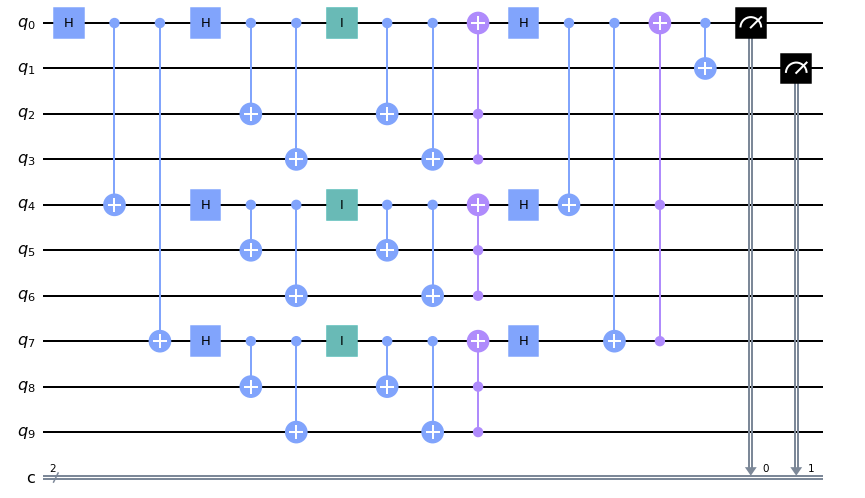

## The original circuit

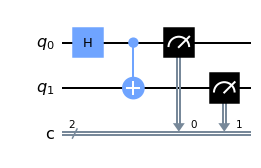

In [164]:
qc = QuantumCircuit(2, 2)
qc.h(0)  # add H gate
qc.cx(0, 1)  # added CNOT gate
qc.measure(range(2), range(2))  # Measure
qc.draw(output='mpl')


{'00': 535, '11': 489}


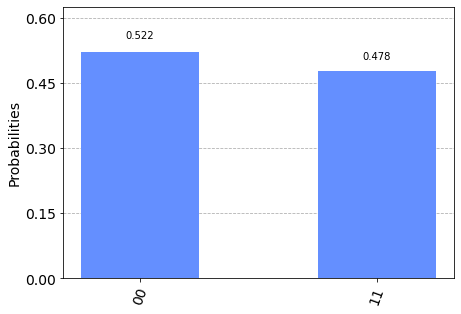

In [165]:
backend = Aer.get_backend('qasm_simulator') 
job = execute(qc, backend, shots=1024) 
result = job.result() 

counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

## Qubit flip protection

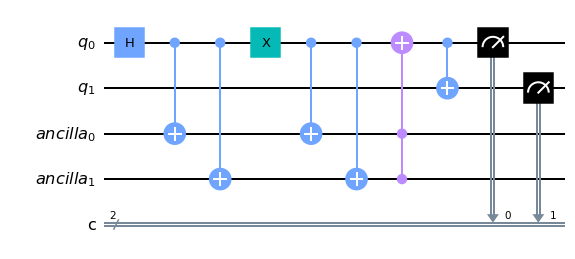

In [166]:
%matplotlib inline

import matplotlib
import pylatexenc
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

qr = QuantumRegister(2, 'q')
anc = QuantumRegister(2, 'ancilla')
cr = ClassicalRegister(2, 'c')

qc = QuantumCircuit(qr, anc, cr)

qc.h(qr[0])              # original part from the first circuit q0

qc.cx(qr[0], anc[0]) # error correction: first ancillary qubit flipped conditionaly on the value of qubit
qc.cx(qr[0], anc[1]) # error correction: second ancillary qubit flipped conditionaly on the value of qubit

###############

qc.x(qr[0]) # error circuit

###############

qc.cx(qr[0], anc[0]) # error correction: first ancillary qubit flipped conditionaly on the value of qubit
qc.cx(qr[0], anc[1]) # error correction: second ancillary qubit flipped conditionaly on the value of qubit

qc.mcx(list(range(2, 4)), 0)

qc.cx(0, 1)      # original part from the first circuit (qubit q1)

qc.measure(range(2), range(2))  # Measure



qc.draw(output='mpl')



{'00': 494, '11': 530}


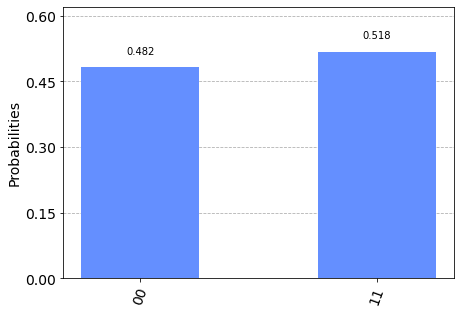

In [167]:

backend = Aer.get_backend('qasm_simulator') 
job = execute(qc, backend, shots=1024) 
result = job.result() 

counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)


## Qubit flip and Phase inversion protection (Shor's algorithm)


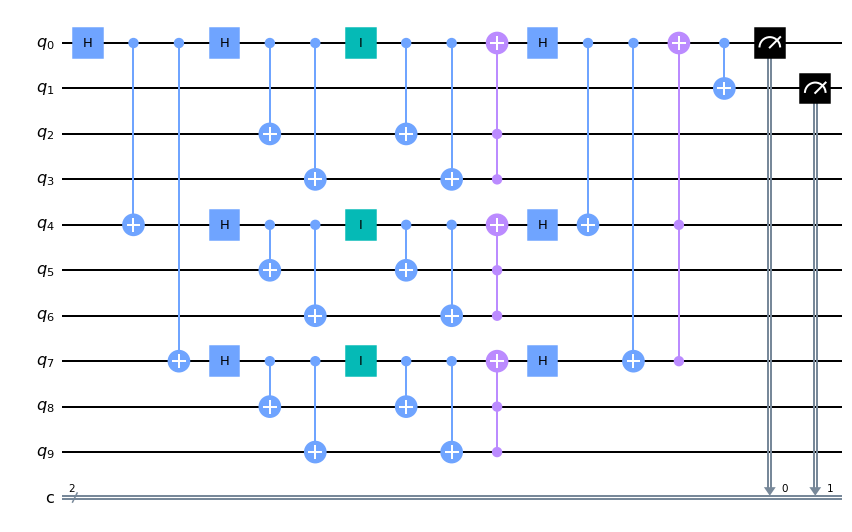

In [168]:
%matplotlib inline

import matplotlib
import pylatexenc
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

qr = QuantumRegister(10, 'q')
cr = ClassicalRegister(2, 'c')

qc = QuantumCircuit(qr, cr)

qc.h(qr[0])              # original part from the first circuit q0

qc.cx(qr[0], qr[4])  # phase inversion correction
qc.cx(qr[0], qr[7])  # phase inversion correction
qc.h(qr[0])          # phase inversion correction
qc.h(qr[4])          # phase inversion correction
qc.h(qr[7])          # phase inversion correction


n = 0
qc.cx(qr[n], qr[n + 2]) # qubit flip correction: second ancillary qubit flipped conditionaly on the value of qubit
qc.cx(qr[n], qr[n + 3]) # qubit flip correction: third ancillary qubit flipped conditionaly on the value of qubit

n = 4
qc.cx(qr[n], qr[n + 1]) # qubit flip correction: first ancillary qubit flipped conditionaly on the value of qubit
qc.cx(qr[n], qr[n + 2]) # qubit flip correction: second ancillary qubit flipped conditionaly on the value of qubit

n = 7
qc.cx(qr[n], qr[n + 1]) # qubit flip correction: first ancillary qubit flipped conditionaly on the value of qubit
qc.cx(qr[n], qr[n + 2]) # qubit flip correction: second ancillary qubit flipped conditionaly on the value of qubit


###############

n = 0
qc.i(qr[n]) # error circuit
#qc.x(qr[n]) # error circuit
#qc.z(qr[n]) # error circuit

n = 4
qc.i(qr[n]) # error circuit
#qc.x(qr[n]) # error circuit
#qc.z(qr[n]) # error circuit

n = 7
qc.i(qr[n]) # error circuit
#qc.x(qr[n]) # error circuit
#qc.z(qr[n]) # error circuit


###############

n = 0
qc.cx(qr[n], qr[n + 2]) # qubit flip correction: second ancillary qubit flipped conditionaly on the value of qubit
qc.cx(qr[n], qr[n + 3]) # qubit flip correction: third ancillary qubit flipped conditionaly on the value of qubit
qc.mcx(list(range(n + 2, n + 3 + 1)), n)  # qubit flip correction: toffoli gate

n = 4
qc.cx(qr[n], qr[n + 1]) # qubit flip correction: first ancillary qubit flipped conditionaly on the value of qubit
qc.cx(qr[n], qr[n + 2]) # qubit flip correction: second ancillary qubit flipped conditionaly on the value of qubit
qc.mcx(list(range(n + 1, n + 2 + 1)), n)  # qubit flip correction: toffoli gate

n = 7
qc.cx(qr[n], qr[n + 1]) # qubit flip correction: first ancillary qubit flipped conditionaly on the value of qubit
qc.cx(qr[n], qr[n + 2]) # qubit flip correction: second ancillary qubit flipped conditionaly on the value of qubit
qc.mcx(list(range(n + 1, n + 2 + 1)), n)  # qubit flip correction: toffoli gate

qc.h(qr[0])          # phase inversion correction
qc.h(qr[4])          # phase inversion correction
qc.h(qr[7])          # phase inversion correction

qc.cx(0, 4)      # phase inversion correction
qc.cx(0, 7)      # phase inversion correction
qc.mcx([4, 7], 0)  # phase inversion correction: toffoli gate

qc.cx(0, 1)      # original part from the first circuit (qubit q1)

qc.measure(range(2), range(2))  # Measure



qc.draw(output='mpl')

{'00': 494, '11': 530}


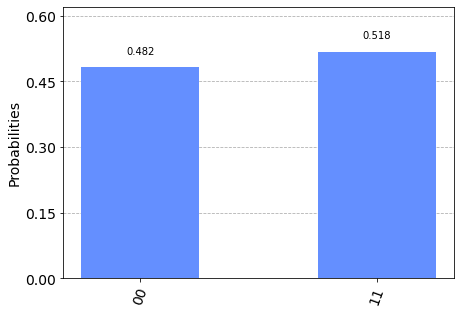

In [169]:
backend = Aer.get_backend('qasm_simulator') 
job = execute(qc, backend, shots=1024) 
result = job.result() 

counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)